### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Linear Regression Model uses a linear function  that is given by:

### $ \hat{y} = wx + b $

### Cost function is given by: $ J(w, b) = 1/N \sum\limits_{i=1}^{n} (y_{i} - (wx_{i} + b))^2$
### To update the parameters: $ w = w - \alpha . dw $ and  $ b = b - \alpha . db$

### To find the gradients or derivatives:
$dJ/dw = 1/N \sum\limits_{i=1}^{n} 2x_{i}(\hat{y} - y_{i})$ <br>
$dJ/db = 1/N \sum\limits_{i=1}^{n}(\hat{y} - y_{i})$

In [2]:
class LinearReg:
    def __init__(self, lr=0.001, iters = 1000): #lr is learning rate or alpha, iters is the number of iterations in the grad descent
        self.lr =lr
        self.iters = iters
        self.w = None
        self.b = None
    
    def fit(self, X, y):
        #initialize the w and b values with zero
        n_samp, feat = X.shape
        self.w = np.zeros(feat)
        self.b = 0 
        
        #initialize with random values
        #self.w = np.random.rand(feat)
        #self.b = np.random.rand(feat)
        
        for _ in range(self.iters): 
            #find the approximation
            y_hat = np.dot(X, self.w) + self.b    #dot product of weights and input + bias
            #calculate the derivative
            dw = (1/n_samp) * np.dot(X.T, (y_hat - y))
            db = (1/n_samp) * np.sum(y_hat - y)
            #update the weights
            self.w -= self.lr*dw
            self.b = self.lr*db
            
    def predict(self, X):
        #calculate the predicted y given X
        #use the approximation
        y_hat = np.dot(X, self.w) + self.b
        return y_hat
        

#### Clarification about the dot product in the for loop of the fit() function:

Dot products are written as: <br> $s = x.y $ <br>

When we expand the equation for dot product, we get: <br>
$s = x.y = \sum\limits_{i=1}^{n} x_{i}y_{i}$ <br>

Using that in the equation of Linear Regression: <br>
$ \sum\limits_{i=1}^{n} x_{i} (\hat{y} - y_{i}) = x_{i} . (\hat{y} - y_{i}) $

We also know that dot product equals matrix multiplication of transpose of one of the vectors. So the above equation becomes: <br>
$ x_{i} . (\hat{y} - y_{i}) = x_{i}^{T} . (\hat{y} - y_{i})$

### Import a dataset to see if the LR class works

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
house = pd.DataFrame(boston['data'], columns = boston['feature_names'])
print(house.shape)

(506, 13)


In [6]:
house['MEDV'] = boston['target']
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# The target variable is in y
y = house['MEDV']

In [9]:
import seaborn as sns

G:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


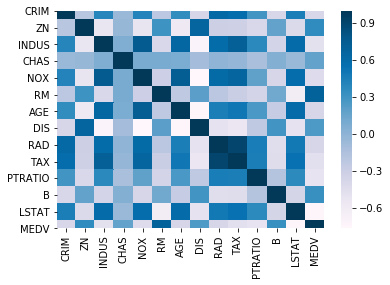

In [10]:
#Plot the pairplot to find the most correlations between the features and the target
sns.heatmap(house.corr(), cmap = 'PuBu')

In [11]:
#For simplicity take X as only one feature i.e n =1
#For this we take average number of rooms as the feature since it has the most correlation to median value
X = house[['RM', 'ZN']]

In [12]:
#splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 152)

In [13]:
y_train.shape

(404,)

In [14]:
#call the class function

regressor = LinearReg()
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

#using the mean squared error for regression to calculate the performance
mse = mean_squared_error(y_test, pred)
print(mse)

51.515985958605924


In [15]:
X_train.RM

309    5.972
53     5.998
468    5.926
420    6.411
59     5.927
       ...  
315    5.705
501    6.593
395    6.471
199    6.975
220    6.951
Name: RM, Length: 404, dtype: float64

G:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
G:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
G:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


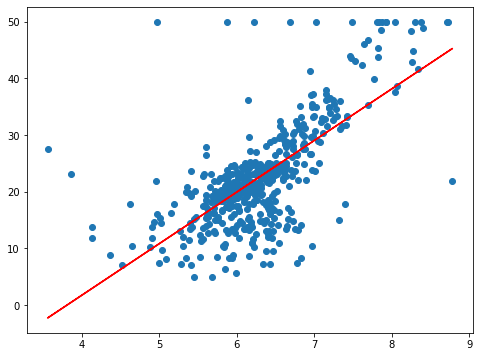

In [16]:
#plot the regression line on the graph

reg_line = regressor.predict(X)
fig = plt.figure(figsize = (8, 6))
plt.scatter(X.RM, y)
m, b = np.polyfit(X.RM, y, 1)
plt.plot(X.RM, m*X.RM+b, 'r')